In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

## Loading Train and Test Datasets 

In [3]:
trainset = pd.read_csv("/kaggle/input/titanic/train.csv")
trainset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
testset = pd.read_csv("/kaggle/input/titanic/test.csv")
testset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Preprocessing and Analysis

In [5]:
trainset.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


From the above dataframe it is evident that the column **Cabin** and **Age** has some missing values, but due to limited number of rows shown we can not estimate the magnitude of missing values. Thus, for better visualization of the null or missing values a **Pearson Heatmap** was plotted below: 

<AxesSubplot:>

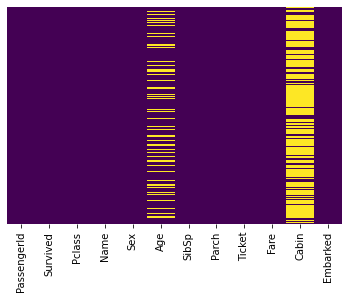

In [6]:
sns.heatmap(data = trainset.isnull(), cmap = "viridis", yticklabels = False, cbar = False)

From the Heatmap shown above, it is clear that the column **Cabin** has a very high number of missing values due to which imputation is also not possible. Thus, the column **Cabin** can not be used while making predictions.  

<AxesSubplot:xlabel='Survived', ylabel='count'>

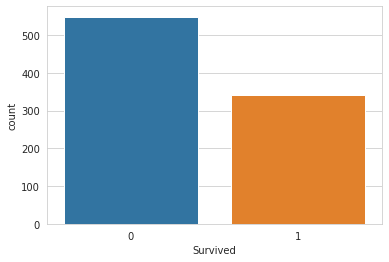

In [7]:
#Checking the number of survivors
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = trainset)

<AxesSubplot:xlabel='Survived', ylabel='count'>

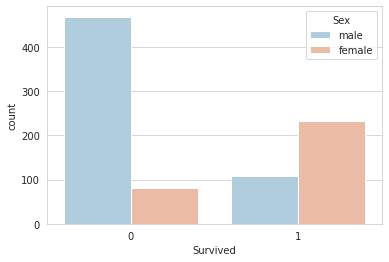

In [8]:
#Checking the number of male and female survivors
sns.countplot(x = 'Survived',hue='Sex',data = trainset, palette = 'RdBu_r')

In [9]:
women = trainset.loc[trainset.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
men = trainset.loc[trainset.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("Percentage of women who survived: ", round(rate_women*100,2))
print("Percentage of men who survived: ", round(rate_men*100,2))

Percentage of women who survived:  74.2
Percentage of men who survived:  18.89


<AxesSubplot:xlabel='Survived', ylabel='count'>

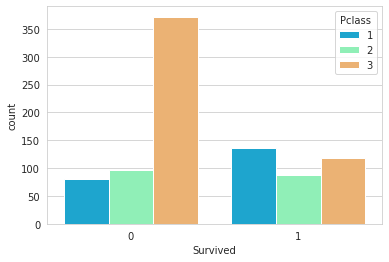

In [10]:
#Count of the survivors based on the Passenger Class
sns.countplot(x = 'Survived',hue = 'Pclass',data = trainset,palette = 'rainbow')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

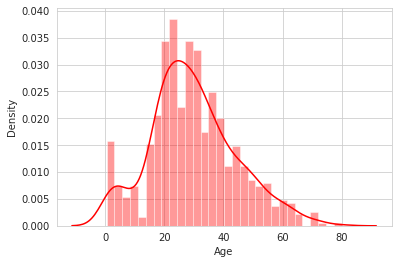

In [11]:
#Distribution of Age of passengers
sns.distplot(trainset['Age'].dropna(),kde = True,color = 'red',bins = 30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

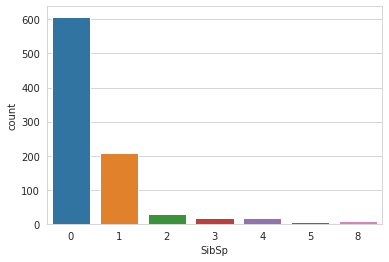

In [12]:
sns.countplot(x = 'SibSp',data = trainset)

<AxesSubplot:xlabel='Parch', ylabel='count'>

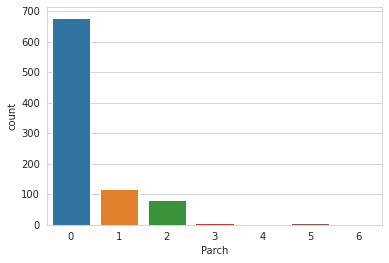

In [13]:
sns.countplot(x = 'Parch',data = trainset)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare'>

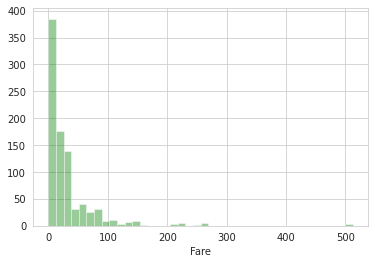

In [14]:
#Distribution of Fare of passengers
sns.distplot(trainset['Fare'],color = 'green',bins = 40,kde = False)

As seen by the heatmap above, the **Age** column has missing values. Thus, for using the data regarding the age for precidicting the survivors the missing values need to be imputed. As seen in the correlation heatmap below that **Age** has the highest correlation (-ve) with the **Passenger Class**, so based on the Pclass, age can be imputed.  

<AxesSubplot:>

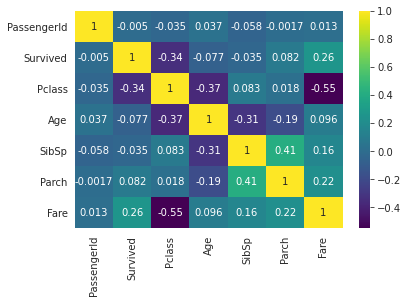

In [15]:
sns.heatmap(trainset.corr(),cmap="viridis",annot=True)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

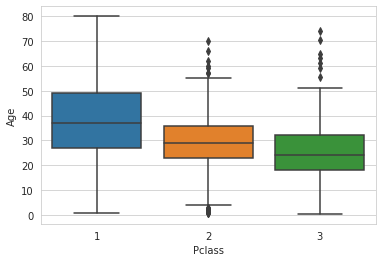

In [16]:
#Age distribution based on various Passenger Classes
sns.boxplot(x = 'Pclass',y = 'Age',data = trainset)

From the above boxplot, the Median Age can be found out for each passenger class and the missing values in the **Age** column can be imputed with the median age for the passenger's class using the **compute_age** function below.

In [17]:
def compute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

<AxesSubplot:>

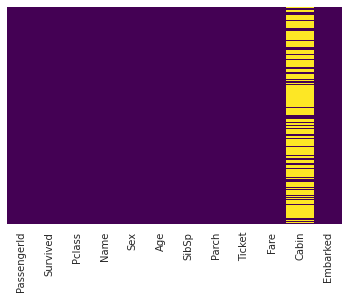

In [18]:
#Applying the compute_age function and checking is all the null values are replaced or not in the trainset
trainset['Age'] = trainset[['Age','Pclass']].apply(compute_age,axis = 1)
sns.heatmap(trainset.isnull(),yticklabels = False,cmap = "viridis",cbar = False)

## Training the Model 

In [19]:
#Y = trainset["Survived"]

#features = ["Pclass", "Sex", "SibSp", "Parch","Age"] #using a list for creating dummies only creates dummies for the required columns and not all the columns
#X = pd.get_dummies(trainset[features])               #here dummies are created only for the sex column
#print(X)

     Pclass  SibSp  Parch   Age  Sex_female  Sex_male
0         3      1      0  22.0           0         1
1         1      1      0  38.0           1         0
2         3      0      0  26.0           1         0
3         1      1      0  35.0           1         0
4         3      0      0  35.0           0         1
..      ...    ...    ...   ...         ...       ...
886       2      0      0  27.0           0         1
887       1      0      0  19.0           1         0
888       3      1      2  24.0           1         0
889       1      0      0  26.0           0         1
890       3      0      0  32.0           0         1

[891 rows x 6 columns]


<AxesSubplot:>

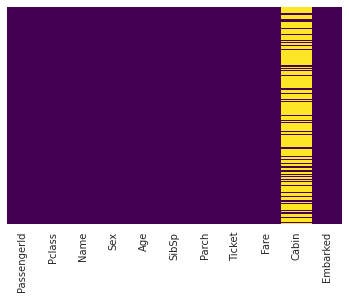

In [20]:
#Applying the compute_age function and checking is all the null values are replaced or not in the testset
#testset['Age'] = testset[['Age','Pclass']].apply(compute_age,axis = 1)
#sns.heatmap(testset.isnull(),yticklabels = False,cmap = "viridis",cbar = False)

In [21]:
#X_test = pd.get_dummies(testset[features])
#print(X_test)

     Pclass  SibSp  Parch   Age  Sex_female  Sex_male
0         3      0      0  34.5           0         1
1         3      1      0  47.0           1         0
2         2      0      0  62.0           0         1
3         3      0      0  27.0           0         1
4         3      1      1  22.0           1         0
..      ...    ...    ...   ...         ...       ...
413       3      0      0  24.0           0         1
414       1      0      0  39.0           1         0
415       3      0      0  38.5           0         1
416       3      0      0  24.0           0         1
417       3      1      1  24.0           0         1

[418 rows x 6 columns]


In [22]:
#training the classifier
#model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
#model.fit(X, Y)
#predictions = model.predict(X_test)

In [23]:
#saving the output
#output = pd.DataFrame({'PassengerId': testset.PassengerId, 'Survived': predictions})
#output.to_csv('my_submission.csv', index=False)
#print("Your submission was successfully saved!")

Your submission was successfully saved!


Since, the score after including the **Age** column is still around 0.76 thus we will exclude the age column from the predictions

In [24]:
Y = trainset["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(trainset[features])
X_test = pd.get_dummies(testset[features])

In [25]:
#training the classifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, Y)
predictions = model.predict(X_test)

In [26]:
#saving the output
output = pd.DataFrame({'PassengerId': testset.PassengerId, 'Survived': predictions})
output.to_csv('my_final_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
